In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from tensorflow.keras.models import Model
from sklearn.mixture import GaussianMixture

In [2]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
input_img = Input(shape=(28, 28))
x = Flatten()(input_img)
encoded = Dense(64, activation='relu')(x)

In [4]:
decoded = Dense(784, activation='sigmoid')(encoded)
decoded = Reshape((28, 28))(decoded)

In [5]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 784)               50960     
                                                                 
 reshape (Reshape)           (None, 28, 28)            0         
                                                                 
Total params: 101200 (395.31 KB)
Trainable params: 101200 (395.31 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 model_4 (Functional)        (None, 32)                111328    
                                                                 
 model_5 (Functional)        (None, 28, 28)            111824    
                                                                 
Total params: 223152 (871.69 KB)
Trainable params: 222768 (870.19 KB)
Non-trainable params: 384 (1.50 KB)
_________________________________________________________________
Epoch 1/150
235/235 [==============================] - 10s 20ms/step - loss: 0.3600 - val_loss: 0.3197
Epoch 2/150
235/235 [==============================] - 4s 19ms/step - loss: 0.3052 - val_loss: 0.3054
Epoch 3/150
235/235 [==============================] - 6s 25ms/step - loss: 0.

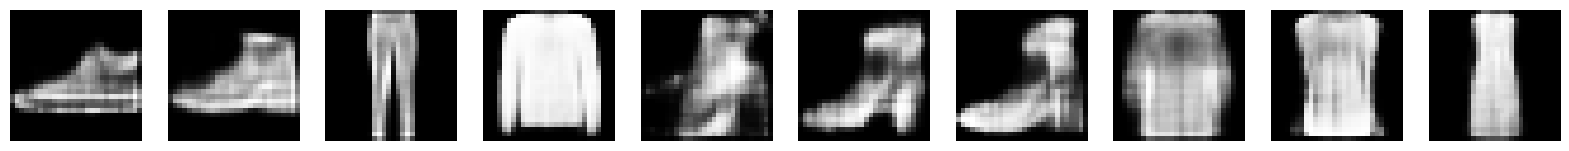

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape,BatchNormalization
from tensorflow.keras.models import Model
from sklearn.mixture import GaussianMixture

# Load the dataset
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Define the encoder
input_img = Input(shape=(28, 28))
x = Flatten()(input_img)
x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x) # Add batch normalization to stabilize learning
x = Dense(64, activation='relu')(x) # Additional dense layer
encoded = Dense(32, activation='relu')(x) # Smaller latent space dimension

# Define the decoder
decoded_input = Input(shape=(32,))
x = Dense(64, activation='relu')(decoded_input)
x = BatchNormalization()(x)
x = Dense(128, activation='relu')(x)
x = Dense(784, activation='sigmoid')(x)
decoded = Reshape((28, 28))(x)

encoder = Model(input_img, encoded)


decoder = Model(decoded_input, decoded)

# Autoencoder model
autoencoder_input = Input(shape=(28, 28))
autoencoder = Model(autoencoder_input, decoder(encoder(autoencoder_input)))
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

# Train the autoencoder
autoencoder.fit(x_train, x_train,
                epochs=150,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# Encode the training data
encoded_imgs = encoder.predict(x_train)

# Fit a Gaussian Mixture Model on the encoded images
gmm = GaussianMixture(n_components=10, covariance_type='full')
gmm.fit(encoded_imgs)

# Sample new points from the GMM and decode them
new_points = gmm.sample(10)[0]  # Generate 10 samples
new_images = decoder.predict(new_points)
new_images = new_images.reshape(-1, 28, 28)

# Display the generated images
plt.figure(figsize=(20, 4))
for i in range(10):
    ax = plt.subplot(2, 10, i + 1)
    plt.imshow(new_images[i], cmap='gray')
    plt.axis('off')
plt.show()
